# Plot training and validation error

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import LabelEncoder

In [3]:
ds = pd.read_csv(r"C:\Users\Tech Pool\Downloads\desti\housing.csv")
ds.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [9]:
ds.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
ds.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
ds['total_bedrooms'] = ds['total_bedrooms'].fillna(ds['total_bedrooms'].median())

In [40]:
le = LabelEncoder()
ds['ocean_proximity'] = le.fit_transform(ds['ocean_proximity'])

C:\Users\Tech Pool\AppData\Local\Temp\ipykernel_11668\147805183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['ocean_proximity'] = le.fit_transform(ds['ocean_proximity'])


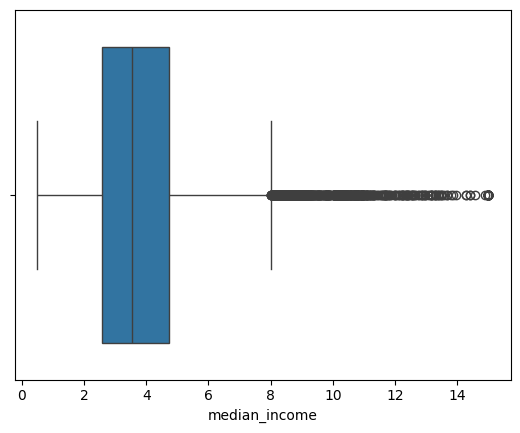

In [22]:
sns.boxplot(x = 'median_income' , data=ds)
plt.show()

In [24]:
q1 = ds['median_income'].quantile(0.25)
q3 = ds['median_income'].quantile(0.75)
iqr = q3-q1

In [26]:
iqr

2.17985

In [27]:
min_range = q1 - (1.5*iqr)
max_range = q3 + (1.5*iqr)

In [28]:
print(min_range)
print(max_range)

-0.7063750000000004
8.013024999999999


In [29]:
ds = ds[ds['median_income']<max_range]

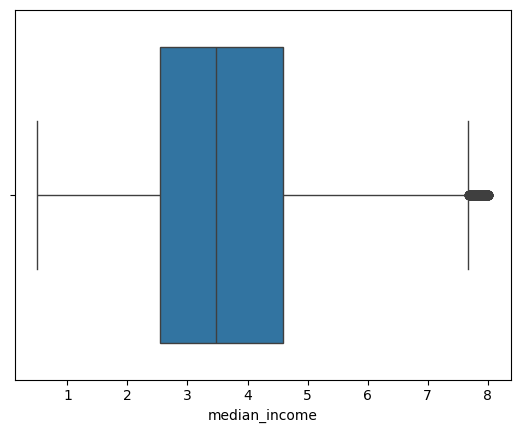

In [30]:
sns.boxplot(x = 'median_income',data = ds)
plt.show()

In [41]:
ds.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,3


In [43]:
x = ds.drop('median_house_value',axis=1)
y = ds['median_house_value']

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
train_error = []
validation_error = []

In [48]:
for depth in range(1,21):
    model = DecisionTreeRegressor(max_depth=depth,random_state=42)
    model.fit(x_train,y_train)
    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)
    train_mse = mean_squared_error(y_train, y_train_predict)
    val_mse = mean_squared_error(y_test, y_test_predict)
    train_error.append(train_mse)
    validation_error.append(val_mse)

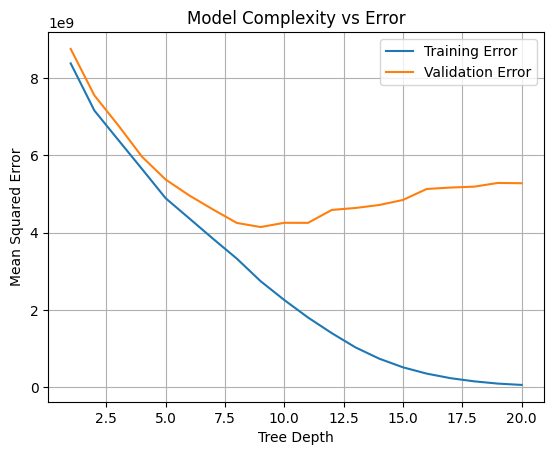

In [49]:
plt.plot(range(1, 21), train_error, label='Training Error')
plt.plot(range(1, 21), validation_error, label='Validation Error')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.title('Model Complexity vs Error')
plt.legend()
plt.grid(True)
plt.show()